> Do the difficult things while they are easy and do the great things while they are small. A journey of a thousand miles must begin with a single step. 
*-Lao Tzu*

I came across Kaggle recently; in the process of heading towards Data Science. This is my very first notebook which I am publishing. 

I see folks here tremendously showcasing their works and exploiting the datasets to get the gem out of them. I thought of starting with a small dataset which can be more linked with me. So, I am performing a short data analysis on my walking activity by analysing the step counts I make every day.

I have recently installed an app in my mobile which tracks my steps - the outdoor and the basic ones; on hourly basis. 
    
![](https://i.imgur.com/a8p80vDm.png) 
        

# Importing essentials and the dataset

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

steps = pd.read_csv("./data/AugustSteps.csv",parse_dates=True)

### Let's have a look at the data we have

In [2]:
steps.head(20)

,Date,Hour Slot,Outdoor Steps,Basic Steps
0,"Monday, July 29, 2019",12am-1am,NaN,NaN
1,"Monday, July 29, 2019",1am-2am,NaN,NaN
2,"Monday, July 29, 2019",2am-3am,NaN,NaN
3,"Monday, July 29, 2019",3am-4am,NaN,NaN
4,"Monday, July 29, 2019",4am-5am,NaN,NaN
5,"Monday, July 29, 2019",5am-6am,NaN,NaN
6,"Monday, July 29, 2019",6am-7am,NaN,NaN
7,"Monday, July 29, 2019",7am-8am,NaN,NaN
8,"Monday, July 29, 2019",8am-9am,NaN,NaN
9,"Monday, July 29, 2019",9am-10am,NaN,NaN


**Making data formatted**

*Changing the time slots in 24-hour format*

In [3]:
def replaceHours(hour):
    replaceString = ""
    if hour.endswith('am'):
        if hour.startswith('12'):
            replaceString += '00'
        elif hour.startswith('10') or hour.startswith('11'):
            replaceString += hour[:2]
        else:
            replaceString += '0'+hour[:1]
    if hour.endswith('pm'):
        if hour.startswith('12'):
            replaceString += hour[:2]
        else:
            replaceString += str(int(hour[:-2])+12)
    return(replaceString)
    
def changeFormat(slot):
    return replaceHours(slot[0])+'-'+replaceHours(slot[1])
    
steps['Hour Slot'] = steps['Hour Slot'].str.split('-').apply(changeFormat)  
steps.head()

,Date,Hour Slot,Outdoor Steps,Basic Steps
0,"Monday, July 29, 2019",00-01,NaN,NaN
1,"Monday, July 29, 2019",01-02,NaN,NaN
2,"Monday, July 29, 2019",02-03,NaN,NaN
3,"Monday, July 29, 2019",03-04,NaN,NaN
4,"Monday, July 29, 2019",04-05,NaN,NaN


*Dividing the Date column into the Weekday and the date*

In [4]:
steps.Date = steps.Date.str.split(', ')
steps['DayOfWeek'] = steps.Date.apply(lambda x:x[0])
steps['DateFormatted'] = steps.Date.apply(lambda x:x[1])
steps.drop('Date', inplace = True, axis = 1)
steps = steps[['DayOfWeek', 'DateFormatted', 'Hour Slot', 'Outdoor Steps', 'Basic Steps']]
steps.head()

,DayOfWeek,DateFormatted,Hour Slot,Outdoor Steps,Basic Steps
0,Monday,July 29,00-01,NaN,NaN
1,Monday,July 29,01-02,NaN,NaN
2,Monday,July 29,02-03,NaN,NaN
3,Monday,July 29,03-04,NaN,NaN
4,Monday,July 29,04-05,NaN,NaN


**Let's see how are my steps across the day divided.**

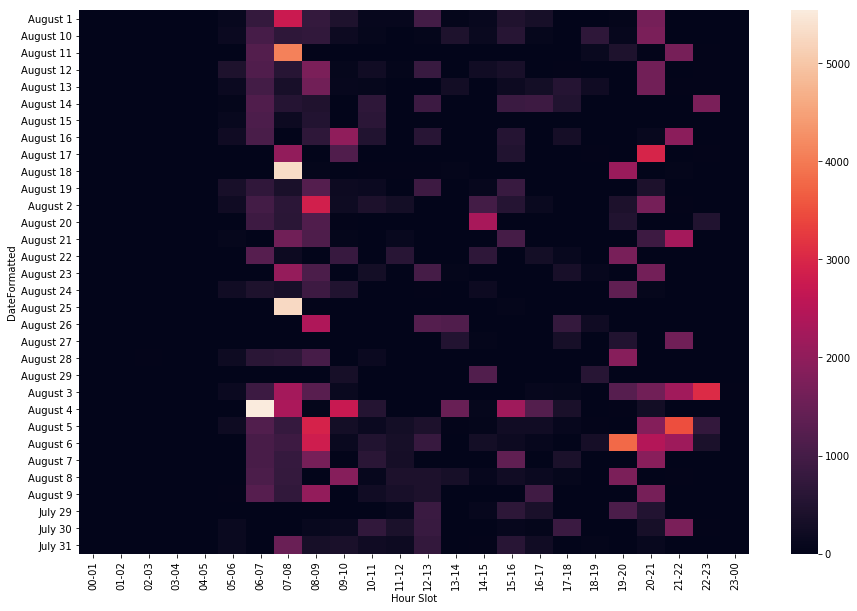

In [5]:
df = steps[:]
df.fillna(0, inplace = True)
df['Total_Steps'] = df['Outdoor Steps'] + df['Basic Steps']
df_new = df.pivot_table(index = 'DateFormatted', columns = 'Hour Slot', values = 'Total_Steps', aggfunc = 'sum')
plt.figure(figsize = (15,10))
sns.heatmap(df_new)

*It is clearly visible that I walk more in  the mornings and the evenings. To be specific, I walk more in the mornings for about 2 hours (7 AM to 9 AM) and about 3 hours in the evenings (7 PM to 10 PM).*

**Now I am curious to know how has been my outdoor walking pattern for the entire month. Let me decipher it.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 <a list of 32 Text xticklabel objects>)

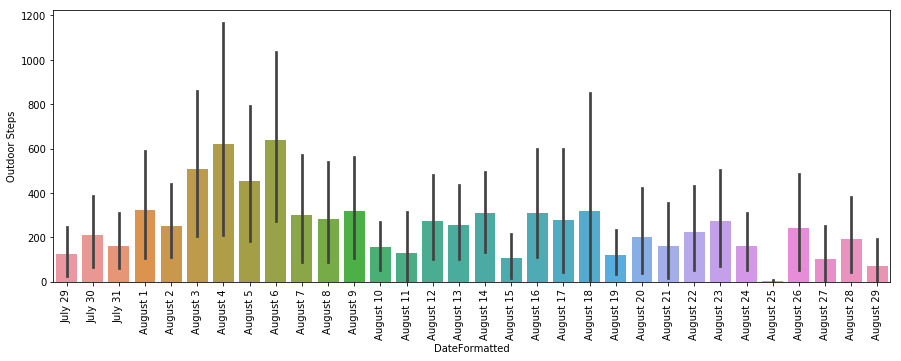

In [6]:
plt.figure(figsize = (15,5))
sns.barplot(x = steps['DateFormatted'], y = steps['Outdoor Steps'])
plt.xticks(rotation = 90)

*I find it more sinusoidal. :p*

**Let's more fine this pattern. Are my weekdays having any impact on my step count?**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

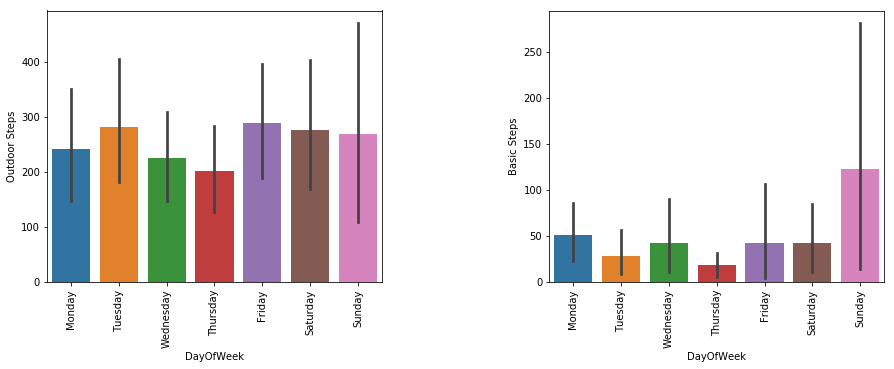

In [7]:
plt.figure(figsize = (15,5))
plt.subplots_adjust(wspace = 0.5)
plt.subplot(1,2,1)
sns.barplot(x = steps['DayOfWeek'], y = steps['Outdoor Steps'])
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.barplot(x = steps['DayOfWeek'], y = steps['Basic Steps'])
plt.xticks(rotation = 90)

*It seems I walk more in home on weekends. This is for sure as "Who goes to the office on Sundays? Right?" But the other thing I notice is that Thursdays are my lazy days - least outdoor walking plus least basic walking.* 

*I guess I prepare on Thurdays by saving fuel for Friday parties :)*

**Let us find my walking central cendency for both the types of steps. Also, I wanna check my steps' spread.**

Mean: Outdoor Steps    6070.59375
dtype: float64
Mean: Basic Steps    1149.25
dtype: float64


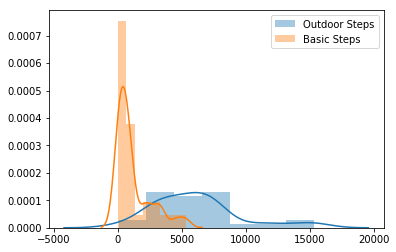

In [8]:
df1 = steps.pivot_table(index='DateFormatted', values='Outdoor Steps', aggfunc = 'sum')
sns.distplot(df1, label = 'Outdoor Steps')
print("Mean:",df1.mean())
df2 = steps.pivot_table(index='DateFormatted', values='Basic Steps', aggfunc = 'sum')
sns.distplot(df2, label = 'Basic Steps')
print("Mean:",df2.mean())
plt.legend()

The outdoor steps have more variance than the indoor ones.

**Let's see this variance in hourly basis.**

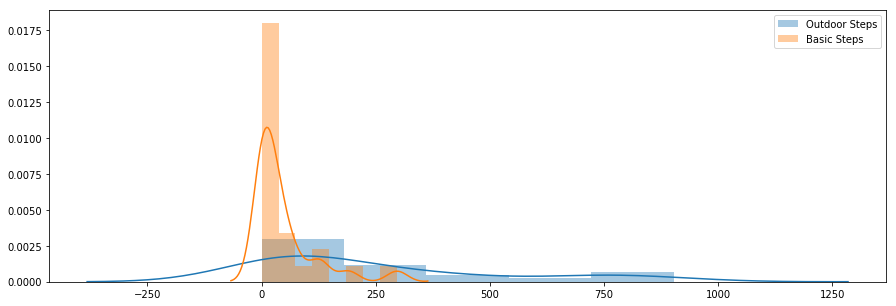

In [9]:
df3 = steps.pivot_table(index='Hour Slot', values='Outdoor Steps', aggfunc = 'mean')
df4 = steps.pivot_table(index='Hour Slot', values='Basic Steps', aggfunc = 'mean')
plt.figure(figsize = (15,5))
sns.distplot(df3, label = 'Outdoor Steps')
sns.distplot(df4, label = 'Basic Steps')
plt.legend()

*Seems like I am very consistent with my Basic steps.*

**Conclusions:-**
* I walk more in mornings and late evenings. (Hope this helps me stay fit yo!)
* I am consistent with my Basic walking pattern rather than the Outdoor ones.
* I walk more outside than at home (Sundays are exceptions. I love experimenting in the kitcken that day).
* Thursdays are the days to save energy for Friday nights. I walk very less on Thursdays.